In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np

import matplotlib.pyplot as plt

In [3]:
import sympy as sm
from sympy.utilities.lambdify import lambdify, implemented_function
from sympy import fourier_series, pi
from sympy.abc import x

In [12]:
def chebyshev_polynom(x, n):
    
    if n == 0:
        return 1
    if n == 1:
        return x
    
    return 2 * x * chebyshev_polynom(x, n - 1) - chebyshev_polynom(x, n - 2)

In [13]:
x = np.linspace(0, 1, 100)
y = lambda x, n: chebyshev_polynom(x, n)

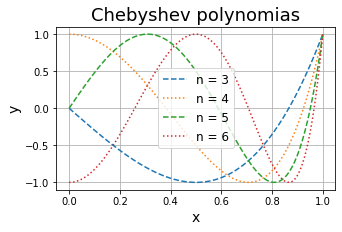

In [14]:
plt.figure(figsize=(5, 3))
plt.title('Chebyshev polynomias', fontsize=18)

plt.plot(x, y(x, 3), '--', label='n = 3')
plt.plot(x, y(x, 4), ':', label='n = 4')
plt.plot(x, y(x, 5), '--', label='n = 5')
plt.plot(x, y(x, 6), ':', label='n = 6')

plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [15]:
from numpy.polynomial.chebyshev import chebfit, chebval

In [16]:
size = 25
x = np.linspace(0, 2, size)
f = lambda x: np.sin(x) + x * np.cos(x)
y = f(x)

factors = lambda x, y, deg: chebfit(x, y, deg=deg)
evalcheb= lambda x, y, deg: chebval(x, factors(x, y, deg))

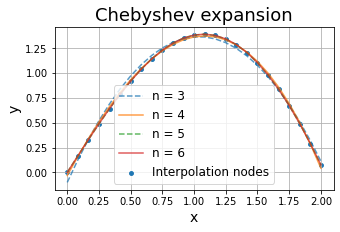

In [17]:
plt.figure(figsize=(5, 3))

plt.title('Chebyshev expansion', fontsize=18)
plt.plot(x, evalcheb(x, y, 2), '--', label='n = 3', alpha=0.75)
plt.plot(x, evalcheb(x, y, 3), '-', label='n = 4', alpha=0.75)
plt.plot(x, evalcheb(x, y, 4), '--', label='n = 5', alpha=0.75)
plt.plot(x, evalcheb(x, y, 5), '-', label='n = 6', alpha=0.75)
plt.scatter(x, y, 15, label='Interpolation nodes')

plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()